Implementing Guassian Mixture Model to get a better picture of how the algorithm works.

[]

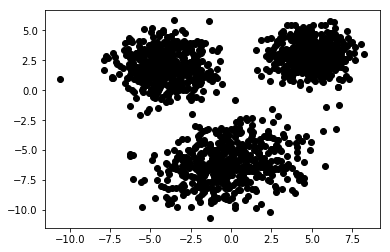

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg
import scipy.stats


#Training Data
training_data = np.zeros((1500,2))
n = len(training_data)
k = 3
m = 2

training_data[0:500] = scipy.stats.multivariate_normal([-4,2],[[2,0],[0,2]]).rvs(500)
training_data[500:1000] = scipy.stats.multivariate_normal([5,3],[[1.5,0],[0,1.5]]).rvs(500)
training_data[1000:1500] = scipy.stats.multivariate_normal([0,-6],[[5,1],[1,3]]).rvs(500)

plt.scatter(training_data[:,0], training_data[:,1], c="black")
plt.plot()

In [2]:
pi = np.random.rand((k))
pi /= np.sum(pi) #Randomly initialize pi so that the elements sum to 1

mu = np.zeros((k,m))
sigma = np.zeros((k,m,m))
cluster = np.zeros((n)) #List to keep track of cluster assigned to each data sample
probabilities = np.zeros((n,k)) #Pij for each data sample
num_of_iter = 0 #Keep track of the number of iterations the algorithm takes
changed = True #Variable to test if algorithm has converged

#Randomly initialize mu and sigma for each cluster
for i in range(3):
    mu[i] = [np.random.rand()*16-8,np.random.rand()*15-10] #Random Mean Vector
    eigval = np.random.rand(m) #Random POSITIVE eigenvalues
    q, _ = scipy.linalg.qr(np.random.rand(m, m)) #Random rotation matrix
    sigma[i] = q.T @ np.diag(eigval) @ q #Random Positive-Semidefinite Covariance Matrix
    
#Expectation Maximaiztion Algorithm
while changed:
    changed = False #Assume no change in the beginning
    
    #Estimation Step: Calculating P_ij vector for each data sample (Probability that data sample i belongs in cluster j)
    for i in range(n):
        px = 0
        for j in range(k):
            try:
                probabilities[i,j] = pi[j]*scipy.stats.multivariate_normal(mu[j], sigma[j]).pdf(training_data[i])
            except np.linalg.LinAlgError as err:
                print(type(err),err.args,err)
                break
        px = sum(probabilities[i])
        probabilities[i] /= px
    
    #Maximization Step: Updating pi, mu, and sigma
    for j in range(k):
        p_j = sum(probabilities[:,j]) #The sum of all the probabilities that a training data belongs in cluster j
        pi[j] = p_j/n #Updating pi[j]
        
        '''Matrix Methods
        mu[j] = sum(training_data.T @ probabilities[:,j])/p_j
        sigma[j] = sum((training_data-mu[j]).T @ (training_data-mu[j]))/p_j
        print(mu[j], sigma[j])
        '''
        
        #Resets mu and sigma for next iteration
        mu[j] -= mu[j]
        sigma[j] -= sigma[j]
        
        for i in range(n):
            mu[j] += probabilities[i,j]*training_data[i] #Numerator of mu update equation
            temp = (training_data[i]-mu[j]/p_j) #Helper variable for sigma calculation
            sigma[j] += probabilities[i,j]*np.outer(temp,temp.T)#Numerator of sigma update equation
        mu[j] /= p_j 
        sigma[j] /= p_j
       
    num_of_iter += 1
    
    #Converges when there is no change in cluster assignment
    for i in range(n):
        if cluster[i] != int(np.argmax(probabilities[i])):
            changed = True 
        #Assigning training sample i to cluster with highest probability of containing it
        cluster[i] = int(np.argmax(probabilities[i])) 
    


print("Expectation-Maximization Algorithm for GMM converged after", num_of_iter, "iterations")

Expectation-Maximization Algorithm for GMM converged after 5 iterations


[]

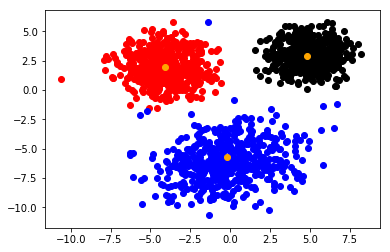

In [3]:
#Plotting data for 3 clusters
for z in range(n):
    if cluster[z] == 0:
        plt.scatter(training_data[z,0], training_data[z,1], c="black")    
    elif cluster[z] == 1:
        plt.scatter(training_data[z,0], training_data[z,1], c="blue")
    elif cluster[z] == 2:
        plt.scatter(training_data[z,0], training_data[z,1], c="red")
for y in range(k):
    plt.scatter(mu[y,0], mu[y,1], c="orange") #Plotting mean of each cluster
#plt.gca().set_aspect('equal', adjustable='box')
plt.plot() 